In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os.path
import os.path as osp
import pandas as pd
from cytokit import io as cytokit_io
from cytokit import config as cytokit_config
from cytokit.ops import illumination_correction
from skimage import exposure
from skimage import io as sk_io
plt.gray()
SEED=5512
None

<Figure size 432x288 with 0 Axes>

In [2]:
import logging
console = logging.StreamHandler()
console.setFormatter(logging.Formatter('%(asctime)s:%(levelname)s:%(name)s: %(message)s'))
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger.addHandler(console)

In [9]:
# exp_name = '7-7-17-multicycle'
# exp_conf_dir = osp.join(os.environ['CYTOKIT_ANALYSIS_REPO_DIR'], 'config', 'experiment', exp_name)
# exp_data_dir = osp.join(os.environ['CYTOKIT_DATA_DIR'], '7-7-17-multicycle-cytokit', 'output', 'v01')
# nuc_midx = 7
# nuc_ch_name = 'ci:HOECHST1'

# exp_name = '2018-01-09-Run0'
# exp_conf_dir = osp.join(os.environ['CYTOKIT_ANALYSIS_REPO_DIR'], 'config', 'experiment', exp_name)
# exp_data_dir = osp.join(os.environ['CYTOKIT_DATA_DIR'], exp_name + '-Clean', 'output', 'v00')
# nuc_midx = 6
# nuc_ch_name = 'ci:HOECHST1'

# exp_name = '20180706-Donor22-R2-Tcell-CODEX_CD3CD4CD85BY5'
# exp_conf_dir = osp.join(os.environ['CYTOKIT_ANALYSIS_REPO_DIR'], 'config', 'experiment', exp_name)
# exp_data_dir = osp.join(os.environ['CYTOKIT_DATA_DIR'], exp_name, 'output', 'v01')
# nuc_midx = 5
# nuc_ch_name = 'ci:DAPI'

# exp_name = '20180706-Donor23-R2-Tcell-CODEX_CD3CD4CD85BY5'
# exp_conf_dir = osp.join(os.environ['CYTOKIT_ANALYSIS_REPO_DIR'], 'config', 'experiment', exp_name)
# exp_data_dir = osp.join(os.environ['CYTOKIT_DATA_DIR'], exp_name, 'output', 'v01')
# nuc_midx = 5
# nuc_ch_name = 'ci:DAPI'

# exp_name = '20180614_D22_RepA_Tcell_CD4-CD8-DAPI_5by5'
# exp_conf_dir = osp.join(os.environ['CYTOKIT_ANALYSIS_REPO_DIR'], 'config', 'experiment', exp_name)
# exp_data_dir = osp.join(os.environ['CYTOKIT_DATA_DIR'], exp_name, 'output', 'v03')
# nuc_midx = 5
# nuc_ch_name = 'ci:DAPI'

# exp_name = '20180802-Donor7_Tcell-CODEX_CD3CD4CD8_7BYB7'
# exp_conf_dir = osp.join(os.environ['CYTOKIT_ANALYSIS_REPO_DIR'], 'config', 'experiment', exp_name)
# exp_data_dir = osp.join(os.environ['CYTOKIT_DATA_DIR'], exp_name, 'output', 'v02')
# nuc_midx = 5
# nuc_ch_name = 'ci:DAPI'

# exp_name = 'RS002_CODEX_Tonsil_180426'
# exp_conf_dir = osp.join(os.environ['CYTOKIT_ANALYSIS_REPO_DIR'], 'config', 'experiment', 'wherrylab', exp_name)
# exp_data_dir = osp.join(os.environ['CYTOKIT_DATA_DIR'], 'wherrylab', exp_name, '2018_08_02_RS002_processed_cytokit', 'output', 'v01')
# nuc_midx = 6
# nuc_ch_name = 'ci:HOECHST2'

exp_name = '20180831-D33-US-LABELED-20X-9BY9'
exp_conf_dir = osp.join(os.environ['CYTOKIT_ANALYSIS_REPO_DIR'], 'config', 'experiment', 'dna-stain', '20180831-stain', exp_name)
exp_data_dir = osp.join(os.environ['CYTOKIT_DATA_DIR'], 'dna-stain', '20180831-stain', exp_name, 'output', 'v00')
nuc_midx = 2
nuc_ch_name = 'ci:DAPI'

config = cytokit_config.load(exp_conf_dir)

In [152]:
config._conf['processor']['illumination_correction']

{'channel_mapping': {'DAPI': 'DAPI', 'PHA': 'PHA', 'Plasmid': 'Plasmid'},
 'feature_params': {'index': {'degree': 3, 'type': 'polynomial'},
  'region': {'degree': 3, 'type': 'polynomial'},
  'tile': None},
 'filter_range': [0.01, 0.99],
 'model_params': {'type': 'ls'}}

In [153]:
ic_conf = {
    'channel_mapping': {'DAPI': 'DAPI', 'PHA': 'PHA', 'Plasmid': 'Plasmid'},
    'feature_params': {
        'index': None,
        'region': {'degree': 3, 'type': 'polynomial'},
        'tile': None
    },
     'filter_range': [0.01, 0.99],
     'model_params': {'type': 'ls'}
}
config._conf['processor']['illumination_correction'] = ic_conf

In [154]:
import imp
imp.reload(illumination_correction)

<module 'cytokit.ops.illumination_correction' from '/lab/repos/cytokit/python/pipeline/cytokit/ops/illumination_correction.py'>

In [155]:
op = illumination_correction.IlluminationCorrection(config)

In [156]:
%pdb ON
op.prepare_region_data(exp_data_dir)

2018-09-04 19:34:48,639:INFO:cytokit.ops.illumination_correction: Preparing illumination correction models


Automatic pdb calling has been turned ON


2018-09-04 19:34:50,038:DEBUG:cytokit.ops.illumination_correction: Building illumination model for region 0, channel "DAPI" using 21227 cells (21660 originally) [feature array shape = (21227, 9), response shape = (21227,)]
2018-09-04 19:34:50,061:DEBUG:cytokit.ops.illumination_correction: Building illumination model for region 0, channel "PHA" using 21227 cells (21660 originally) [feature array shape = (21227, 9), response shape = (21227,)]
2018-09-04 19:34:50,082:DEBUG:cytokit.ops.illumination_correction: Building illumination model for region 0, channel "Plasmid" using 21227 cells (21660 originally) [feature array shape = (21227, 9), response shape = (21227,)]
2018-09-04 19:35:02,335:DEBUG:cytokit.ops.illumination_correction: Resulting illumination image array shape = (9072, 12096) (dtype = float32)


In [157]:
est = op.data[0][1]['DAPI']

In [158]:
# PolynomialFeatures(degree=7).fit_transform(np.array([[1,2],[3,4]])).shape

In [159]:
#est.named_steps['est'].coef_
est.coef_.shape

(9,)

In [160]:
est.coef_

array([-2.85118759e-05, -1.71214845e-05,  1.92426678e-09,  1.01722934e-08,
       -9.33451397e-10, -1.92993923e-13,  1.22724024e-13, -7.56114939e-13,
        1.41124585e-13])

In [177]:
img_ic = op.data[0][0]['DAPI']
#img_ic = op.data[0][0]['Plasmid']
#img_ic = op.data[0][0]['CD8']
#img_ic = op.data[0][0]['HOECHST2']
#img_ic = op.data[0][0]['HOECHST1']
img_ic.shape

(9072, 12096)

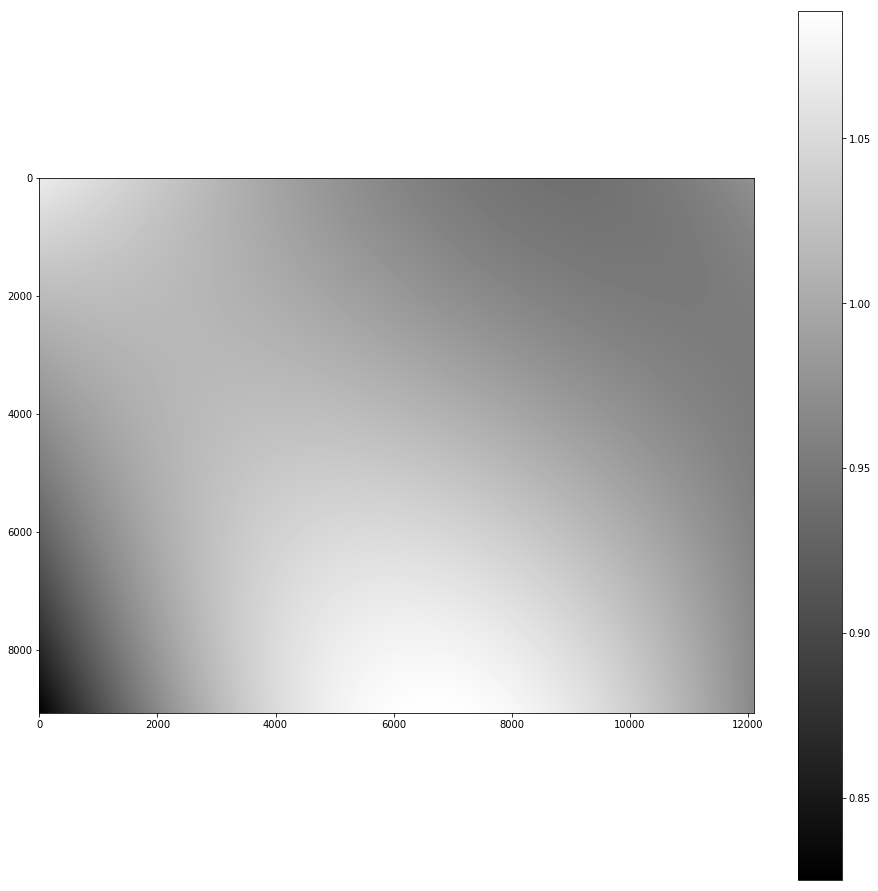

In [184]:
plt.imshow(img_ic)
plt.gcf().set_size_inches(16, 16)
plt.colorbar()

Load original image to compare to:

In [179]:
#img_path = osp.join(exp_data_dir, cytokit_io.get_montage_image_path(0, 'hoechst'))
img_path = osp.join(exp_data_dir, cytokit_io.get_montage_image_path(0, 'best_z_segm'))
#img_path = osp.join(exp_data_dir, cytokit_io.get_montage_image_path(1, 'best_z_segm'))
img_path

'/lab/data/dna-stain/20180831-stain/20180831-D33-US-LABELED-20X-9BY9/output/v00/montage/best_z_segm/R001.tif'

In [180]:
img = cytokit_io.read_tile(img_path)
img.shape

(1, 1, 5, 9072, 12096)

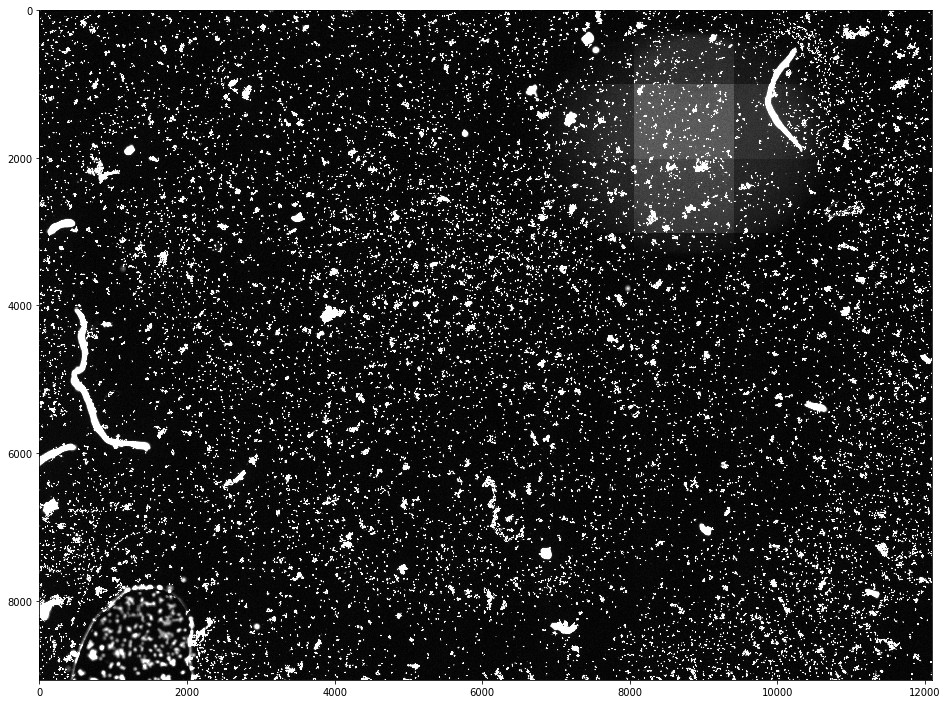

In [183]:
img_orig = img[0, 0, nuc_midx]
plt.imshow(img_orig.clip(0, 50))
#plt.imshow(img_orig.clip(0, 10000))
#plt.imshow(img_orig)
plt.gcf().set_size_inches(16, 16)

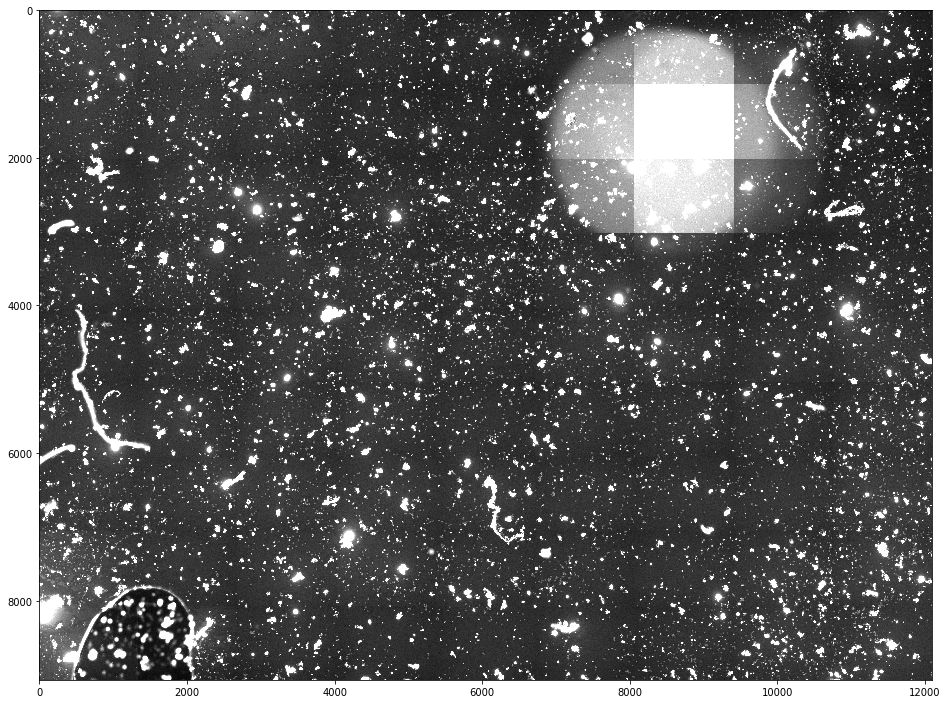

In [176]:
img_res = img[0, 0, nuc_midx] / img_ic
#plt.imshow(img_res)
plt.imshow(img_res.clip(0, 50))
#plt.imshow(img_res.clip(0, 10000))
plt.gcf().set_size_inches(16, 16)

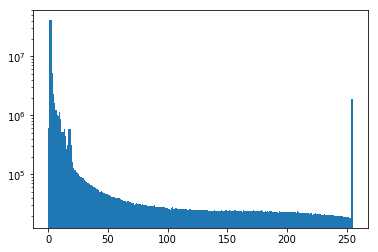

In [167]:
plt.hist(img_orig.ravel(), bins=256)
#plt.xscale('log')
plt.yscale('log')
None

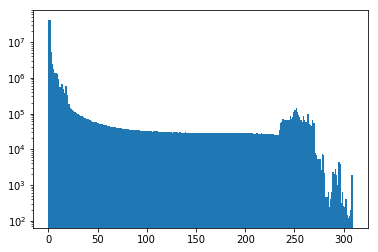

In [168]:
plt.hist(img_res.ravel(), bins=256)
plt.yscale('log')
# plt.xscale('log')
None